# Прогнозирование восстановления золота
По предоставленным данным с параметрами этапов добычи, флотации и очистки золотоносной руды модель должна предсказать коэффициент восстановления золота. Это поможет оптимизировать производство и не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-данных" data-toc-modified-id="Чтение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение данных</a></span></li><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Анализ-недоступных-параметров" data-toc-modified-id="Анализ-недоступных-параметров-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ недоступных параметров</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах</a></span></li><li><span><a href="#2.2-Изучение-размера-гранул-сырья" data-toc-modified-id="2.2-Изучение-размера-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Изучение размера гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-металлов" data-toc-modified-id="Исследование-суммарной-концентрации-металлов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации металлов</a></span></li></ul></li><li><span><a href="#Модели-машинного-обучения" data-toc-modified-id="Модели-машинного-обучения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модели машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Метрика" data-toc-modified-id="Метрика-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метрика</a></span></li><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span></li><li><span><a href="#Кросс-валидация-и-выбор-лучшей-модели" data-toc-modified-id="Кросс-валидация-и-выбор-лучшей-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Кросс-валидация и выбор лучшей модели</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных
### Чтение данных
Импортируем необходимые для исследования библиотеки.

Импортируем необходимые для исследования библиотеки.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

Загрузим и изучим предоставленные датасеты.

In [2]:
data_train = pd.read_csv('../datasets/gold_recovery_train.csv')
data_train.info()
data_train.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 14.151341   
1                                 13.998353   

   secondary_cleaner.state.floatbank6_a_level  
0                                 -605.841980  
1                                 -599.787184  

[2 rows x 87 columns]

In [3]:
data_test = pd.read_csv('../datasets/gold_recovery_test.csv')
data_test.info()
data_test.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                             8.08   
1                         14.987471                             8.08   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 12.023554   
1                                 12.058140   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -497.795834   
1                                 -498.695773   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  4.872511   
1                                  4.878850   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.037437   
1                                 -500.162375   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 26.705889   
1                                 25.019940   

   secondary_cleaner.state.floatbank6_a_level  
0                                 -499.709414  
1                                 -499.819438  

[2 rows x 53 columns]

In [4]:
data_full = pd.read_csv('../datasets/gold_recovery_full.csv')
data_full.info()
data_full.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 14.151341   
1                                 13.998353   

   secondary_cleaner.state.floatbank6_a_level  
0                                 -605.841980  
1                                 -599.787184  

[2 rows x 87 columns]

Нам предоставлены 3 датасета: учебный, тестовый и полный. В учебном и полном предоставлены все параметры (87 штук), в то время как в тестовом их только 53.

В тестовом датасете отсутствую целевые признаки - `rougher.output.recovery` и `final.output.recovery`. Они необходимы для проверки результатов машинного обучения. Их можно будет взять в полном датасете.

### Расчет эффективности обогащения

Напишем функцию, вычисляющую эффективность обогащения по формуле `Recovery = C × (F-T)/(F × (C-T)) × 100%`, где:
- C - доля золота в концентрате после флотации/очистки;
- F - доля золота в сырье/концентрате до флотации/очистки;
- T - доля золота в отвальных хвостах после флотации/очистки.

In [5]:
def recovery(row):
    recov = (row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au'])
    /row['rougher.input.feed_au']/(row['rougher.output.concentrate_au']-row['rougher.output.tail_au']))*100
    return recov

In [6]:
recovery_calculating = data_train.dropna().apply(recovery, axis=1)
pd.DataFrame([data_train.dropna()['rougher.output.recovery'],recovery_calculating],
             index =['Исходное значение','Расчетное значение']).T.head()

Исходное значение  Расчетное значение
0          87.107763           87.107763
1          86.843261           86.843261
2          86.842308           86.842308
3          87.226430           87.226430
4          86.688794           86.688794

Расчетные и исходные значения выглядят одинакого. Посчитаем среднюю абсолютную ошибку.

In [7]:
mean_absolute_error(data_train.dropna()['rougher.output.recovery'], recovery_calculating)

1.058171431933917e-14

Значение ошибки сравнимо с нулем. Данные корректные, формула работает.

### Анализ недоступных параметров

При помощи множества, найдем разницу между признаками в тестовом и учебном датасете.

In [8]:
unavailable_feature = set(data_train.columns) - set(data_test.columns)
unavailable_feature

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовом датасете недоступны следующие параметры:
1. Расчетные параметры этапа флотации
2. Параметры выходного сырья на каждом из этапов
3. Параметры хвостов на каждом из этапов

При обучении модели необходимо будет их удалить из признаков.

### Предобработка данных

Необходимо провести предобработку данных, очистить тренировочный и тестовый датасеты от пропусков.

Проверим количество пропусков в датасетах.

In [9]:
data_train.isna().sum().sort_values(ascending=False).head(10)

rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64

В тренировочном датасете большое количество пропусков. Больше всего неизвестных параметров в эффективности обогащения на этапе флотации, и параметров хвостов на там же этапе.

Попробуем рассчитать эффективность обогащения.

In [10]:
#data_train['rougher.output.recovery'] = data_train.apply(recovery, axis=1)
#ZeroDivisionError: ('float division by zero', 'occurred at index 99')

Из этого действия становится понятно, что есть позиции, где доля золота в начальном продукте равно 0 (судя по формуле `Recovery = C × (F-T)/(F × (C-T)) × 100%`). Если в начальном сырье золота нет, то нет смысла проводить какие-либо операции над ним. Удалим данные, где `rougher.input.feed_au` == 0. Заодно удалим пропуски.

In [11]:
data_train = data_train[data_train['rougher.input.feed_au']>0]
data_train.isna().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol         1874
rougher.output.recovery                   1331
rougher.output.tail_ag                    1072
rougher.output.tail_au                    1071
rougher.output.tail_sol                   1071
rougher.input.floatbank11_xanthate         814
rougher.state.floatbank10_e_air            539
primary_cleaner.output.concentrate_sol     510
primary_cleaner.input.sulfate              421
rougher.input.floatbank10_sulfate          393
dtype: int64

Пропуски в параметрах хвостов практически идентичны по количеству. Просмотрим их.

In [12]:
(data_train[data_train['rougher.output.tail_ag'].isna()]
    [['rougher.output.tail_ag','rougher.output.tail_au','rougher.output.tail_sol']]).head(7)

rougher.output.tail_ag  rougher.output.tail_au  rougher.output.tail_sol
129                     NaN                     NaN                      NaN
130                     NaN                     NaN                      NaN
131                     NaN                     NaN                      NaN
132                     NaN                     NaN                      NaN
133                     NaN                     NaN                      NaN
134                     NaN                     NaN                      NaN
135                     NaN                     NaN                      NaN

Удалим все строки с пропусками одновременно в этих 3х параметрах.

In [13]:
data_train = data_train.dropna(subset=['secondary_cleaner.output.tail_sol','rougher.output.recovery','rougher.output.tail_ag','rougher.output.tail_sol'], how='all')
data_train.isna().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol         1687
rougher.output.recovery                   1144
rougher.output.tail_ag                     885
rougher.output.tail_au                     884
rougher.output.tail_sol                    884
rougher.input.floatbank11_xanthate         801
rougher.state.floatbank10_e_air            527
primary_cleaner.output.concentrate_sol     434
primary_cleaner.input.sulfate              407
rougher.input.floatbank10_sulfate          381
dtype: int64

Попытаемся еще раз посчитать эффективность обогащения. Т.к. формула считает точно, применим ее сразу ко всему столбцу.

In [14]:
data_train['rougher.output.recovery'] = data_train.apply(recovery, axis=1)
data_train.isna().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol         1687
rougher.output.tail_ag                     885
rougher.output.tail_au                     884
rougher.output.recovery                    884
rougher.output.tail_sol                    884
rougher.input.floatbank11_xanthate         801
rougher.state.floatbank10_e_air            527
primary_cleaner.output.concentrate_sol     434
primary_cleaner.input.sulfate              407
rougher.input.floatbank10_sulfate          381
dtype: int64

Проверим, как меняется значение эффективности обогащения от строки к строке.

In [15]:
data_train['rougher.output.recovery'].head(10)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
Name: rougher.output.recovery, dtype: float64

Эффективность меняется достаточно немного. Линейно проинтерполируем значения с соседними. Максимальный "разрыв" (количество пропусков подряд) установим равным 20.

In [16]:
data_train = data_train.interpolate(limit=20)
data_train.isna().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol     440
rougher.input.floatbank11_xanthate    432
rougher.state.floatbank10_e_air       398
rougher.output.recovery               311
rougher.output.tail_ag                311
rougher.output.tail_sol               311
rougher.output.tail_au                311
primary_cleaner.input.sulfate         193
rougher.input.floatbank11_sulfate     154
rougher.input.floatbank10_sulfate     122
dtype: int64

Удалим строки с пропусками в признаках, которые содержатся в тестовой выборке.

In [17]:
data_train = data_train.dropna(subset=list(set(data_train.columns)-unavailable_feature)).reset_index(drop=True)
data_train.isna().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol             394
rougher.output.recovery                       103
rougher.output.tail_ag                        103
rougher.output.tail_sol                       103
rougher.output.tail_au                        103
final.output.concentrate_sol                   21
final.output.tail_pb                            6
primary_cleaner.output.concentrate_pb           5
primary_cleaner.output.concentrate_sol          5
secondary_cleaner.state.floatbank6_a_level      0
dtype: int64

Удалим строки с пропусками в целевом признаке `rougher.output.recovery`.

In [18]:
data_train = data_train.dropna(subset=['rougher.output.recovery'])

Пропуски остались только в признаках, которые будут неизвестны во время обучения. Ничего с ними делать не будем. Проверим, на сколько сократился размер выборки. В исходном датасете 16860 строк.

In [19]:
data_train.shape[0]

14272

Теперь проанализируем тестовую выборку.

In [20]:
data_test.isna().sum().sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.input.feed_rate                      40
secondary_cleaner.state.floatbank3_a_air     34
dtype: int64

Перед началом очистки найдем все не попавшие в тестовую выборку признаки (столбцы `unavailable_feature`). Для этого значения `datе` из полного датасета сопоставим с значениями `date` из тестовой выборки.

In [21]:
df1 = data_test[sorted(data_test.columns)] # Создадим датасет df1, в который положим тестовый датасет с отсортированными индексами
df2_full = (data_full[data_full['date']
                .isin(df1['date'])]) # Найдем соответствующие df1 строки в полном датасете
df2 = (df2_full[sorted(list(set(data_full.columns)-unavailable_feature))] #сравняем количество столбцов в датасетах
                .reset_index(drop=True))

Убедимся в идентичности датасетов. Сперва просто проверим сумму всех параметров.

In [22]:
df1.sum(axis=1).sum()==df2.sum(axis=1).sum()

True

Суммы равны, это значит, что в датасетах одни и теже данные. Теперь необходимо проверить порядок.

In [23]:
df1.equals(df2) #почему-то говорит False, поэтому сравним датасеты зрительно

False

In [24]:
df1.sample(3, random_state=1234)

date  primary_cleaner.input.depressant  \
3401  2017-09-20 17:59:59                          8.461298   
5786  2017-12-29 02:59:59                         15.999992   
3799  2017-10-07 07:59:59                          5.958760   

      primary_cleaner.input.feed_size  primary_cleaner.input.sulfate  \
3401                             6.61                     114.874016   
5786                             7.46                     189.204450   
3799                             6.54                     164.457893   

      primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
3401                        1.305160                             1398.920911   
5786                        1.003586                             1497.042012   
3799                        1.069929                             1451.714016   

      primary_cleaner.state.floatbank8_a_level  \
3401                               -500.300053   
5786                               -399.915805   
3799                               -500.329900   

      primary_cleaner.state.floatbank8_b_air  \
3401                             1397.722357   
5786                             1499.462755   
3799                             1451.871143   

      primary_cleaner.state.floatbank8_b_level  \
3401                               -500.314772   
5786                               -404.417348   
3799                               -514.827030   

      primary_cleaner.state.floatbank8_c_air  ...  \
3401                             1400.949431  ...   
5786                             1497.658816  ...   
3799                             1451.911701  ...   

      secondary_cleaner.state.floatbank4_a_air  \
3401                                 12.010894   
5786                                 19.972337   
3799                                 17.021183   

      secondary_cleaner.state.floatbank4_a_level  \
3401                                 -499.332103   
5786                                 -500.474808   
3799                                 -500.984504   

      secondary_cleaner.state.floatbank4_b_air  \
3401                                  8.971983   
5786                                 14.972835   
3799                                 14.910363   

      secondary_cleaner.state.floatbank4_b_level  \
3401                                 -399.289146   
5786                                 -500.396658   
3799                                 -399.661426   

      secondary_cleaner.state.floatbank5_a_air  \
3401                                  9.077968   
5786                                 10.946224   
3799                                 12.082837   

      secondary_cleaner.state.floatbank5_a_level  \
3401                                 -500.687877   
5786                                 -499.468317   
3799                                 -500.633699   

      secondary_cleaner.state.floatbank5_b_air  \
3401                                  7.032442   
5786                                  8.983138   
3799                                  9.024392   

      secondary_cleaner.state.floatbank5_b_level  \
3401                                 -476.574816   
5786                                 -500.003124   
3799                                 -500.104686   

      secondary_cleaner.state.floatbank6_a_air  \
3401                                  9.981417   
5786                                 11.999021   
3799                                 13.004768   

      secondary_cleaner.state.floatbank6_a_level  
3401                                 -499.256664  
5786                                 -499.848070  
3799                                 -500.707632  

[3 rows x 53 columns]

In [25]:
df2.sample(3, random_state=1234)

date  primary_cleaner.input.depressant  \
3401  2017-09-20 17:59:59                          8.461298   
5786  2017-12-29 02:59:59                         15.999992   
3799  2017-10-07 07:59:59                          5.958760   

      primary_cleaner.input.feed_size  primary_cleaner.input.sulfate  \
3401                             6.61                     114.874016   
5786                             7.46                     189.204450   
3799                             6.54                     164.457893   

      primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
3401                        1.305160                             1398.920911   
5786                        1.003586                             1497.042012   
3799                        1.069929                             1451.714016   

      primary_cleaner.state.floatbank8_a_level  \
3401                               -500.300053   
5786                               -399.915805   
3799                               -500.329900   

      primary_cleaner.state.floatbank8_b_air  \
3401                             1397.722357   
5786                             1499.462755   
3799                             1451.871143   

      primary_cleaner.state.floatbank8_b_level  \
3401                               -500.314772   
5786                               -404.417348   
3799                               -514.827030   

      primary_cleaner.state.floatbank8_c_air  ...  \
3401                             1400.949431  ...   
5786                             1497.658816  ...   
3799                             1451.911701  ...   

      secondary_cleaner.state.floatbank4_a_air  \
3401                                 12.010894   
5786                                 19.972337   
3799                                 17.021183   

      secondary_cleaner.state.floatbank4_a_level  \
3401                                 -499.332103   
5786                                 -500.474808   
3799                                 -500.984504   

      secondary_cleaner.state.floatbank4_b_air  \
3401                                  8.971983   
5786                                 14.972835   
3799                                 14.910363   

      secondary_cleaner.state.floatbank4_b_level  \
3401                                 -399.289146   
5786                                 -500.396658   
3799                                 -399.661426   

      secondary_cleaner.state.floatbank5_a_air  \
3401                                  9.077968   
5786                                 10.946224   
3799                                 12.082837   

      secondary_cleaner.state.floatbank5_a_level  \
3401                                 -500.687877   
5786                                 -499.468317   
3799                                 -500.633699   

      secondary_cleaner.state.floatbank5_b_air  \
3401                                  7.032442   
5786                                  8.983138   
3799                                  9.024392   

      secondary_cleaner.state.floatbank5_b_level  \
3401                                 -476.574816   
5786                                 -500.003124   
3799                                 -500.104686   

      secondary_cleaner.state.floatbank6_a_air  \
3401                                  9.981417   
5786                                 11.999021   
3799                                 13.004768   

      secondary_cleaner.state.floatbank6_a_level  
3401                                 -499.256664  
5786                                 -499.848070  
3799                                 -500.707632  

[3 rows x 53 columns]

Все значения полностью идентичны. Теперь мы имеем все неизвестные параметры для тестового датасета.

Проверим пропуски в целевом признаке.

In [26]:
data_test_all = df2_full #переименуем df2. Теперь будем работать с этим датасетом.
data_test_all[['rougher.output.recovery','final.output.recovery']].isna().sum()

rougher.output.recovery    546
final.output.recovery      442
dtype: int64

В целевых признаках много пропусков. Возможно некоторые удастся рассчитать по формуле. Для начала удалим из тестового датасета все строки, у которых входной параметр содержания золота равен 0. Логично, что и на выходе будет 0. Это можно предсказать и без моделей.

In [27]:
data_test_all = data_test_all[data_test_all['rougher.input.feed_au']>0]

In [28]:
data_test_all[['rougher.output.recovery','final.output.recovery']].isna().sum()

rougher.output.recovery    161
final.output.recovery       57
dtype: int64

Рассчитаем неизвестную концентрацию после флотации. Остальные пропущенные значения отбросим, т.к. без целевого признака невозможно оценить модель.

In [29]:
data_test_all['rougher.output.recovery'] = data_test_all.apply(recovery, axis=1)
data_test_all = data_test_all.dropna(subset=['rougher.output.recovery','final.output.recovery'])
data_test_all[['rougher.output.recovery','final.output.recovery']].isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

Просмотрим пропуски в признаках. Проинтерполируем недостающие значения.

In [30]:
data_test_all[(set(data_train.columns)-unavailable_feature)].isna().sum().sort_values(ascending=False).head()

rougher.input.floatbank11_xanthate          26
rougher.input.feed_sol                      21
rougher.input.floatbank11_sulfate            9
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank10_sulfate            5
dtype: int64

In [31]:
data_test_all.loc[:,(set(data_train.columns)-unavailable_feature)] = data_test_all.loc[:,(set(data_train.columns)-unavailable_feature)].interpolate(limit=12)
data_test_all[(set(data_train.columns)-unavailable_feature)].isna().sum().sort_values(ascending=False).head(3)

rougher.state.floatbank10_e_level             0
rougher.input.floatbank10_xanthate            0
secondary_cleaner.state.floatbank6_a_level    0
dtype: int64

Все пропущенные значения обработаны. Датасеты готовы для анализа.

## Анализ данных
### Концентрация металлов на различных этапах
Изучим, как меняется концетрация металлов на различных этапах процесса обогащения. Для этого напишем функцию, строющую график.

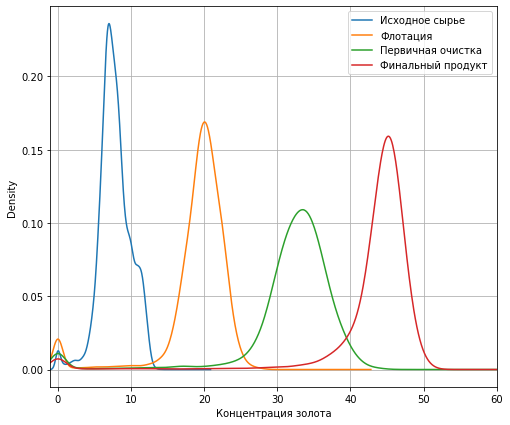

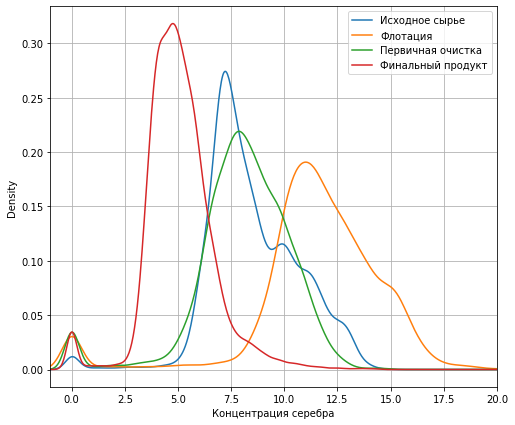

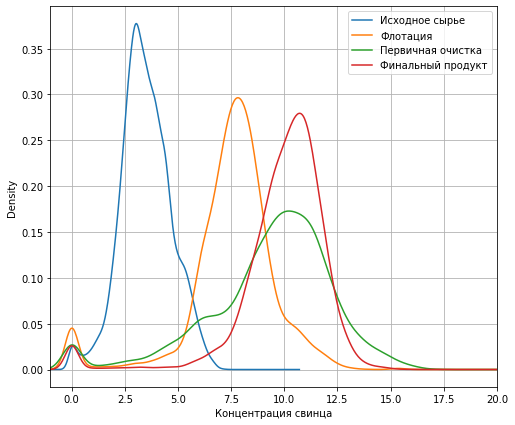

In [32]:
def density(data, metall, label,xmax):
    data[f'rougher.input.feed_{metall}'].plot(kind='density', label ='Исходное сырье', figsize=(8,7))
    data[f'rougher.output.concentrate_{metall}'].plot(kind='density', label ='Флотация')
    data[f'primary_cleaner.output.concentrate_{metall}'].plot(kind='density', label ='Первичная очистка')
    data[f'final.output.concentrate_{metall}'].plot(kind='density', label ='Финальный продукт',grid=True)
    plt.legend()
    plt.xlabel(label)
    plt.xlim(left=-1,right=xmax)
    plt.show()

density(data_train,'au' ,'Концентрация золота',60);
density(data_train,'ag' ,'Концентрация серебра',20);
density(data_train,'pb' ,'Концентрация свинца',20);

Выводы можно сделать следующие:
1. концентрация золота увеличивается с каждым этапом;
2. Концентрация серебра увеличивается после процесса флотации, но после 2х очисток становится меньше, чем в изначальном продукте;
3. Концентрация свинца увеличивается после процесса флотации и первичной очистки, а после вторичной очистки его концентрация "стягивается" к среднему, уменьшаются хвосты;
4. Наблюдается нулевая концентрация каждого металла на каждом из этапов. Похоже на артефакт.

### 2.2 Изучение размера гранул сырья
Изучим размер гранул сырья. Если размер на учебной и тестовой выборках разный - предсказания могут быть некорректными.

Средний размер гранул
Тестовая выборка:                   55.937535
Тренировочная выборка:              58.703345

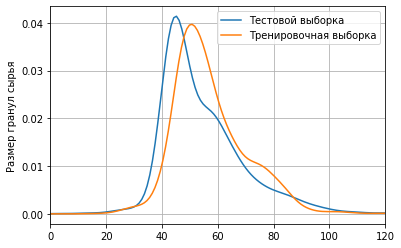

In [33]:
data_test['rougher.input.feed_size'].plot(kind='density', label ='Тестовой выборка',grid=True)
data_train['rougher.input.feed_size'].plot(kind='density', label ='Тренировочная выборка',grid=True)
plt.xlim(left=0,right=120)
plt.ylabel('Размер гранул сырья')
plt.legend()
pd.DataFrame([data_test['rougher.input.feed_size'].mean(),
           data_train['rougher.input.feed_size'].mean()], index =['Тестовая выборка:','Тренировочная выборка:'],
            columns = ['Средний размер гранул'])

На тестовой выборке средний размер гранул незначительно меньше. Попробуем провести стат тест по Стьюденту. Нулевая гипотеза - размер гранул на выборках не отличается.

In [34]:
cat1 = data_test['rougher.input.feed_size'].dropna()
cat2 = data_train['rougher.input.feed_size'].dropna()

print('p-value =',ttest_ind(cat1, cat2)[1])

p-value = 2.498347345849375e-15


Значение p сравнимо с нулем (пусть α=0,01). Это значит, что нулевую гипотезу необходимо отвергнуту - размер гранул различается. Это плохо, но визуально распределения похожи, размах один, поэтому условно примем, что размер гранул на двух выборках одинаковый

### Исследование суммарной концентрации металлов

Исследуем суммарную концентрацию металлов в сырье на различных этапах очистки. Для начала изучим концентрацию на тренировочной выборке.

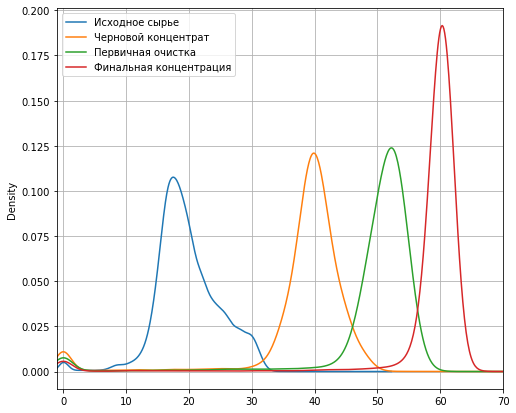

In [35]:
def sum_conc(data, process, lable):
    conc = data[f'{process}_au']+data[f'{process}_pb']+data[f'{process}_ag']
    conc.plot(kind='density', grid=True, figsize=(8,7), label = lable)
    plt.legend()
sum_conc(data_train, 'rougher.input.feed', 'Исходное сырье')
sum_conc(data_train, 'rougher.output.concentrate', 'Черновой концентрат')
sum_conc(data_train, 'primary_cleaner.output.concentrate', 'Первичная очистка')
sum_conc(data_train, 'final.output.concentrate', 'Финальная концентрация')
plt.xlim(left=-1,right=70);

Концентрация металлов имеет тенденцию к увеличению. Это происходит т.к. на разных этапах убирается пустая порода. Но также наблюдается полностью нулевая концентрация в области ноля. Так быть не может.

Исследуем концентрацию металлов на тестовой выборке. В самой тестовой выборке доступна только концентрация исходного сырья, концентрацию сырья на остальных этапах посмотрим по полным данным.

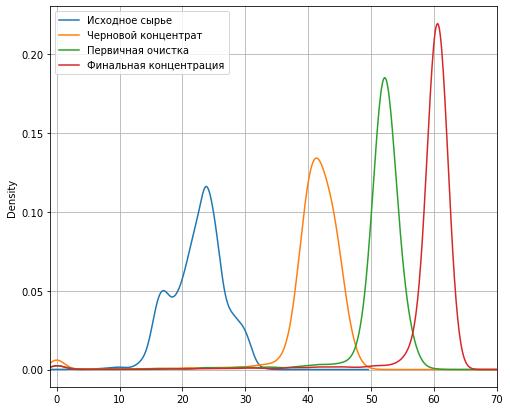

In [36]:
sum_conc(data_test_all, 'rougher.input.feed', 'Исходное сырье')
sum_conc(data_test_all, 'rougher.output.concentrate', 'Черновой концентрат')
sum_conc(data_test_all, 'primary_cleaner.output.concentrate', 'Первичная очистка')
sum_conc(data_test_all, 'final.output.concentrate', 'Финальная концентрация')
plt.xlim(left=-1,right=70);

Распределения на разных выборках похожи. Также наблюдается небольной скачок в области нуля.

Удалим нулевые значения концентраций на обоих выборках. Возможно на обогащение попала пустая порода.

In [37]:
def drop_small(data, param ,conc):
    data = data[(data[f'{param}_au'] + data[f'{param}_pb'] + data[f'{param}_ag'])>conc]
    return data

Отбросим строки с металлами, суммарная концентрация которых меньше единицы на всех этапах обогащения.

In [38]:
for i in ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']:
    data_train = drop_small(data_train, i, 1)
    data_test_all = drop_small(data_test_all, i, 1)

## Модели машинного обучения
### Метрика
Главной метрикой оценки моделей будет sMAPE - симметричное среднее абсолютное процентное отклонение. Напишем функцию, которая его вычисляет. На основании функции создадим скорер.

In [39]:
def smape(T, P): #T-true P-predict
    return 100/len(T) * np.sum(2 * np.abs(P - T) / (np.abs(T) + np.abs(P)))
my_scorer = make_scorer(smape, greater_is_better = False)

### Подготовка данных для обучения

Отделим целевые признаки от обучающих.

In [40]:
### обучающая и валидационная выборка
features_train = data_train.drop([*unavailable_feature, 'date'] ,axis=1)
target_train_1 = data_train['rougher.output.recovery']
target_train_2 = data_train['final.output.recovery']
### тестовая выборка
features_test = data_test_all.drop([*unavailable_feature, 'date'] ,axis=1)
target_test_1 = data_test_all['rougher.output.recovery']
target_test_2 = data_test_all['final.output.recovery']

### Кросс-валидация и выбор лучшей модели

При помощи `GridSearchCV` обучим 2 модели случайного леса для предсказания `rougher.output.recovery` и `final.output.recovery`. Метрикой качества будет выступать `smape`, лежащее в основе `my_scorer`. Лучшие модели сохраним отдельно.

In [41]:
parametrs = { 'n_estimators': range (30, 51, 10),
              'max_depth': range (1, 9, 2)}
clf = RandomForestRegressor()
grid = GridSearchCV(clf, parametrs,scoring = my_scorer, cv=3)
grid.fit(features_train, target_train_1)
rougher_model = grid.best_estimator_
rougher_smape = grid.best_score_
print(grid.best_params_)
'smape =', rougher_smape

{'max_depth': 5, 'n_estimators': 30}


('smape =', -11.294229693846878)

In [42]:
clf = RandomForestRegressor()
grid = GridSearchCV(clf, parametrs,scoring = my_scorer, cv=3)
grid.fit(features_train, target_train_2)
final_model = grid.best_estimator_
output_smape = grid.best_score_
'smape =', output_smape

('smape =', -9.962639100344804)

Найдем итоговое smape лучших моделей.

In [43]:
def final_smape(rouger, final):
    return rouger*0.25+final*0.75

In [44]:
final_smape(rougher_smape, output_smape)

-10.295536748720323

Отрицательное значение т.к. `greater_is_better = False`.

При помощи кросс-валидации посмотрим на результат линейной регрессии. Метрикой опять будет являться smape.

In [45]:
rougher_linear = cross_val_score(LinearRegression(), features_train, target_train_1, cv=10, scoring = my_scorer)
rougher_linear.mean()

-98.28936727436738

Среднее значение очень плохое. Просмотрим, из каких значений оно складывается.

In [46]:
rougher_linear

array([ -11.68000423, -105.98725569, -114.8718764 , -112.48560001,
        -93.383039  , -139.90967208,  -89.5291407 ,  -68.82199031,
        -79.91268034, -166.31241397])

Значения явно завышенные. Проверим 2й признак.

In [47]:
final_linear = cross_val_score(LinearRegression(), features_train, target_train_2, cv=10, scoring = my_scorer)
final_linear.mean()

-10.237010471203522

Скорее всего, линейная модель на 1м признаке ведет себя неадекватно из-за того, что не все параметры из тестовой выборки влияют на `rougher.output.recovery`. Разделим признаки.

In [48]:
roger_features =['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',]
rougher_linear = cross_val_score(LinearRegression(), features_train[roger_features], target_train_1, cv=10, scoring = my_scorer)
rougher_linear.mean()

-84.1818136273255

Отделение признаков не помогло. Линейная регрессия не подходит для данного исследования.

### Тестирование модели

Протестируем лучшую модель случайного леса на тестовой выборке.

Сперва получим предсказания:

In [49]:
predict_rougher = rougher_model.predict(features_test)
predict_final = final_model.predict(features_test)

Посчитаем суммарное smape:

In [50]:
smape1 = smape(target_test_1,predict_rougher)
print(smape1)
smape2 = smape(target_test_2, predict_final)
print(smape2)     
final_smape(smape1, smape2)

4.503157635968839
8.038329870018504


7.154536811506088

Сравним результат со средним значением по тренировочной выборке:

In [51]:
mean_model = np.full(
    shape=len(target_test_1),
    fill_value=target_train_1.mean())
smape1 = smape(target_test_2,mean_model)
print('Rougher smape',smape1)
mean_model = np.full(
    shape=len(target_test_2),
    fill_value=target_train_2.mean())
smape2 = smape(target_test_2,mean_model)
print('Final smape', smape2)
print('Итоговое smape', final_smape(smape1, smape2))

Rougher smape 7.595056392644614
Final smape 8.670944265158212
Итоговое smape 8.401972297029813


Модель превосходит средний результат.

## Вывод

В результате работы была предсказана эффективность процесса обогащения золота. Результатом работы является обученная модель, способная по входным параметрам предсказывать эффективность процесса.

Для достижения цели работы было:
1. Загружены и изучены данные;
2. Рассчитана эффективность обогащения;
3. Проанализированы признаки, недоступные в тестовой выборке;
4. Проведена предобработка данных, почищены пропуски;
5. Проанализирована концентрация металлов на разных этапах, удалены аномалии;
6. Построены модели машинного обучения случайного леса и линейной регрессии;
7. Протестирована модель случайного леса на тестовой выборке.

По итогу предсказаний обученной модели SMAE = 7,15. Это лучше, чем показатель заполнения средним SMAE = 8,40.